In [ ]:
!git clone https://github.com/Skyline-9/Visionary-Vids.git

Cloning into 'Visionary-Vids'...
remote: Enumerating objects: 331, done.
remote: Counting objects: 100% (331/331), done.
remote: Compressing objects: 100% (236/236), done.
remote: Total 331 (delta 150), reused 212 (delta 84), pack-reused 0
Receiving objects: 100% (331/331), 583.50 KiB | 4.35 MiB/s, done.
Resolving deltas: 100% (150/150), done.


In [ ]:
%cd Visionary-Vids/results

[Errno 2] No such file or directory: 'Visionary-Vids/results'
/content/Visionary-Vids/results/tvsum


In [ ]:
# import required module
import os
# assign directory (pick whichever dataset you want to do)
directory = 'tvsum'
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        print(f)

tvsum/tvsum_vu_metrics.json
tvsum/tvsum_pk_metrics.json
tvsum/tvsum_ds_metrics.json
tvsum/tvsum_fm_metrics.json
tvsum/tvsum_ga_metrics.json
tvsum/tvsum_bt_metrics.json
tvsum/tvsum_ms_metrics.json
tvsum/tvsum_vt_metrics.json
tvsum/tvsum_pr_metrics.json
tvsum/tvsum_bk_metrics.json


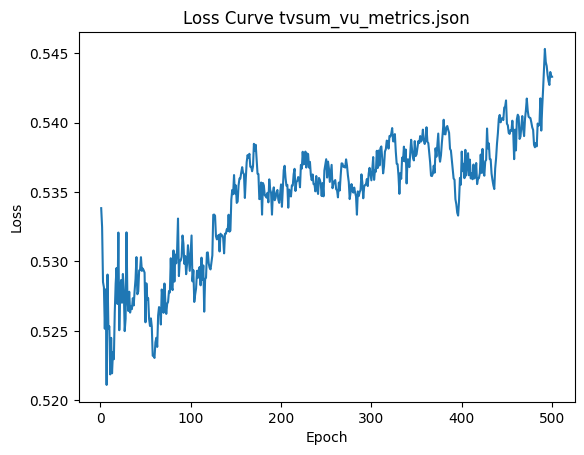

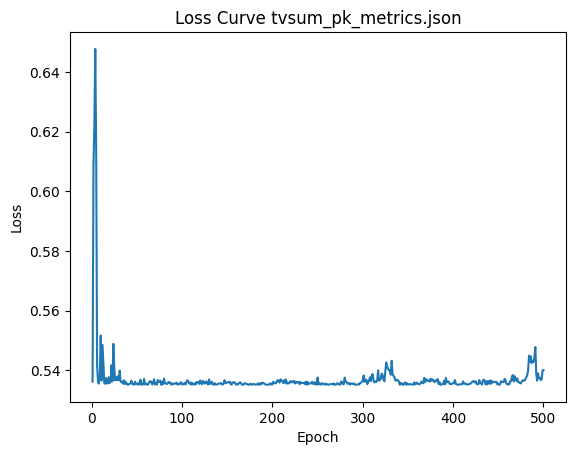

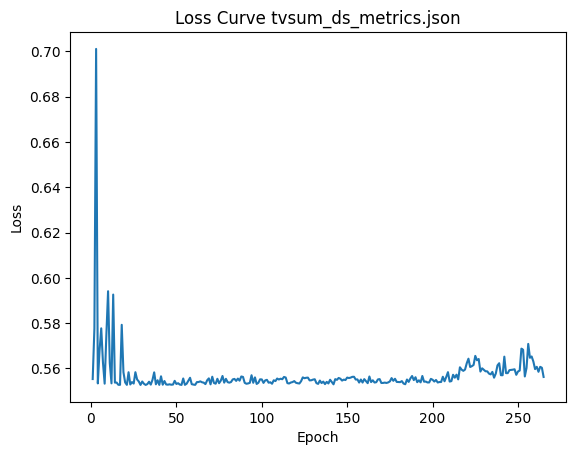

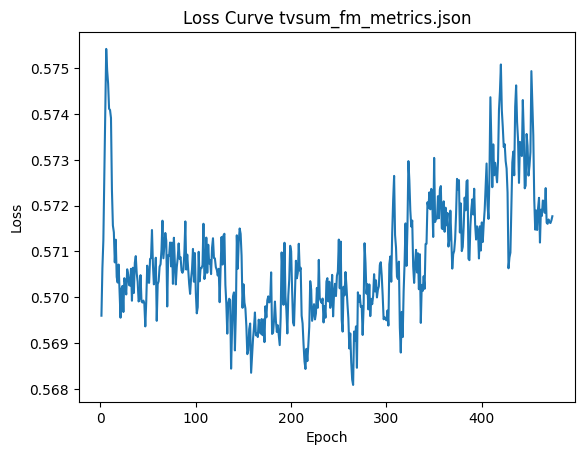

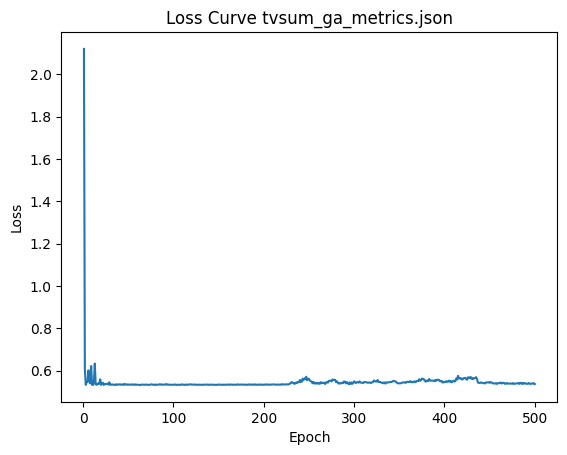

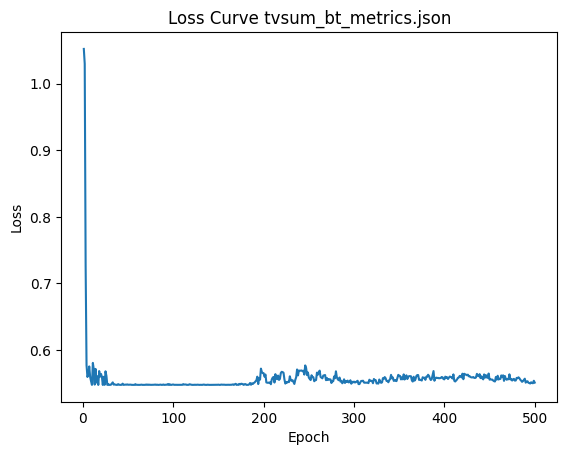

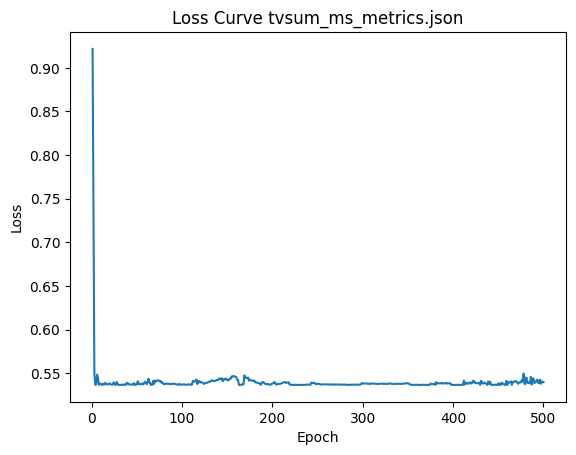

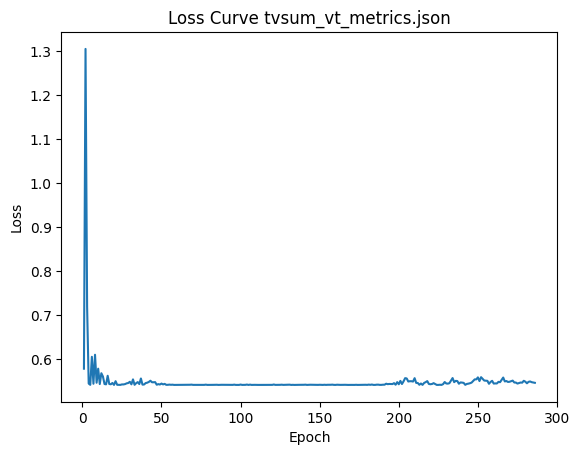

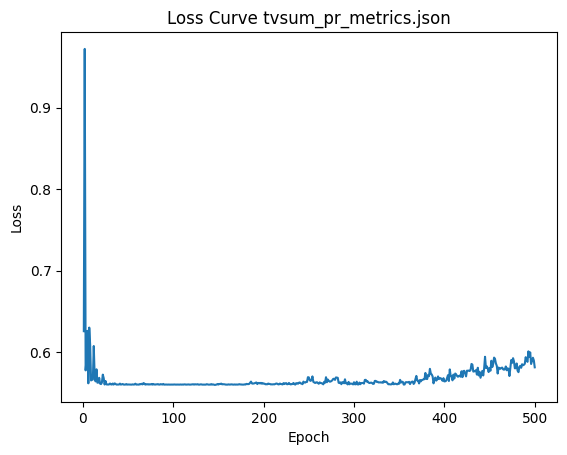

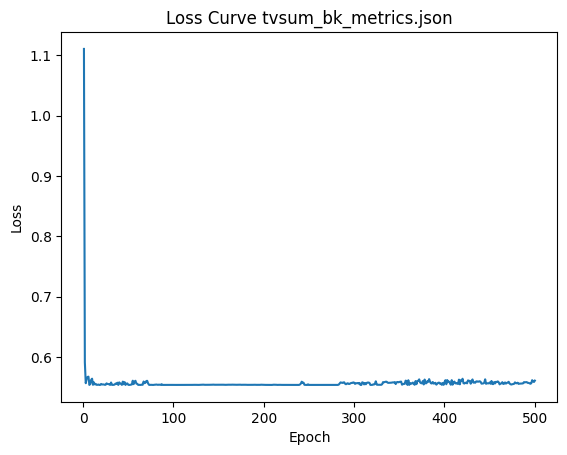

<Figure size 640x480 with 0 Axes>

In [35]:
import json
import matplotlib.pyplot as plt
# iterate over files in
# that directory
for filename in os.listdir(directory):
    epochs = list()
    loss = list()
    with open(os.path.join(directory, filename), "r") as f:
      i = 0
      for line in f:
        # Remove any leading/trailing whitespace and newlines
        line = line.strip()

        # Ignore empty lines
        if not line:
            continue

        # Decode the JSON object
        obj = json.loads(line)

        if obj["mode"] == "val":

          # Do something with the object
          epochs.append(obj["epoch"])
          loss.append(obj["loss"])
    # Group the losses by epoch in groups of 10
    #groups = [(epochs[i:i+10], loss[i:i+10]) for i in range(0, len(loss), 10)]
    #min_epochs = [min(group[0]) for group in groups]
    #min_loss = [min(group[1]) for group in groups]
    # Plot the minimum losses for each group of 10 epochs
    plt.plot(epochs, loss)
    plt.title(f"Loss Curve {filename}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()
    plt.savefig(f"loss_curve_{filename}.png")